# Project Outline

- We have to scrape data from 
- url = https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off
- We need to have name, price, ratings, reviews

In [2]:
# on the course of this project, we will use these required libraries
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [3]:
#let us import URL and request data
url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

page = requests.get(url)
#status code is necessary to check if its succesfull
page.status_code

200

In [5]:
soup = BeautifulSoup(page.text, 'html.parser')

In [6]:
#
main_class = '_3pLy-c row'
main_data = soup.find_all('div', class_=main_class)

In [7]:
len(main_data)

24

In [8]:
data1 = main_data[0]

In [9]:
data1

<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGENJWF4KJTPENS2XJXA_MOBGENJWF4KJTPEN_"><div class="_3LWZlK">4.4</div></span><span class="_2_R_DZ"><span><span>1,26,429 Ratings </span><span class="_13vcmD">&amp;</span><span> 7,352 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">4 GB RAM | 64 GB ROM | Expandable Upto 1 TB</li><li class="rgWa7D">16.76 cm (6.6 inch) Full HD+ Display</li><li class="rgWa7D">50MP + 5MP + 2MP | 8MP Front Camera</li><li class="rgWa7D">6000 mAh Lithium Ion Battery</li><li class="rgWa7D">Exynos 850 Processor</li><li class="rgWa7D">1 Year Warranty Provided By the Manufacturer from Date of Purchase</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹9,699</div><div class="_3I9_wc _27UcVY">₹<!-- -->14,999</div><div

In [10]:
#we will find the data for 1st element, based on their class and using find. We use strip function as well
title = data1.find('div', class_='_4rR01T').text.strip()
discounted_price = data1.find('div', class_='_30jeq3 _1_WHN1').text.strip()
rating = data1.find('span', class_='_2_R_DZ').text.strip()
star = data1.find('div', class_='_3LWZlK').text.strip()
price_before_discount = data1.find('div', class_='_3I9_wc _27UcVY').text.strip()

In [11]:
print(title,discounted_price,rating,star,price_before_discount)

SAMSUNG Galaxy F13 (Nightsky Green, 64 GB) ₹9,699 1,26,429 Ratings & 7,352 Reviews 4.4 ₹14,999


In [12]:
#create an empty list to store data at end
phone_data = []

for data in main_data:
    #create a local empty dictionary
    temp_dict={}
    temp_dict['title'] = data.find('div', class_='_4rR01T').text.strip()
    
    #we need to remove ‘₹’ symbol from the price column we used text. 
    #Replace command to remove that symbol from column.
    temp_dict['discounted_price'] = data.find('div', class_='_30jeq3 _1_WHN1').text.replace('₹','').strip()
    
    rating_element = data.find('span', class_='_2_R_DZ')
    if rating_element is not None:
        temp_dict['rating'] = rating_element.text.strip()
    else:
        temp_dict['rating'] = None
        
    star_element = data.find('div', class_='_3LWZlK')
    if star_element is not None:
        temp_dict['stars'] = star_element.text.strip()
    else:
        temp_dict['stars'] = None
        
    temp_dict['price_before_discount'] = data.find('div', class_='_3I9_wc _27UcVY').text.replace('₹', '').strip()
    
   #appending all data to the list created
    phone_data.append(temp_dict)

# Data Cleaning

In [13]:
phone_df = pd.DataFrame(phone_data)

In [14]:
phone_df.dropna(inplace=True)

In [15]:
# Split 'rating' column based on '&' character and create separate columns for each part of the rating
phone_df[['ratings', 'reviews']] = phone_df['rating'].str.split('&', expand=True).apply(lambda x: x.str.strip())

# Remove non-numeric characters (including commas) from the rating columns
phone_df['ratings'] = phone_df['ratings'].apply(lambda x: int(''.join(filter(str.isdigit, x))))
phone_df['reviews'] = phone_df['reviews'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

# Drop the original 'rating' column
phone_df.drop('rating', axis=1, inplace=True)

# Print the updated DataFrame
print(phone_df)


                                           title discounted_price stars  \
0     SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)            9,699   4.4   
1                   POCO C50 (Royal Blue, 32 GB)            5,749   4.4   
2                POCO C50 (Country Green, 32 GB)            5,749   4.4   
3     SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)            9,699   4.4   
4     SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)            9,699   4.4   
5              REDMI 10 (Caribbean Green, 64 GB)            9,299   4.3   
6                 REDMI 10 (Pacific Blue, 64 GB)            9,299   4.3   
7               REDMI 10 (Midnight Black, 64 GB)            9,299   4.3   
8              realme C35 (Glowing Black, 64 GB)           10,999   4.4   
9    SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)           10,699   4.4   
10             realme C35 (Glowing Green, 64 GB)           10,999   4.4   
11   SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)           10,699   4.4   
12        Infinix HOT 20 

In [16]:
phone_df.head()

,title,discounted_price,stars,price_before_discount,ratings,reviews
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)","9,699",4.4,"14,999",126429,7352
1,"POCO C50 (Royal Blue, 32 GB)","5,749",4.4,"8,999",3353,160
2,"POCO C50 (Country Green, 32 GB)","5,749",4.4,"8,999",3353,160
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)","9,699",4.4,"14,999",126429,7352
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","9,699",4.4,"14,999",126429,7352


In [17]:
#removing commas in the columns, and converting them to integers

phone_df['discounted_price'] = phone_df['discounted_price'].astype(str).apply(lambda x: int(''.join(filter(str.isdigit, x))))
phone_df['price_before_discount'] = phone_df['price_before_discount'].astype(str).apply(lambda x: int(''.join(filter(str.isdigit, x))))


In [18]:
#converting stars into float type
phone_df['stars'] = phone_df['stars'].astype(float)

In [19]:
phone_df.dtypes

title                     object
discounted_price           int64
stars                    float64
price_before_discount      int64
ratings                    int64
reviews                    int64
dtype: object

In [20]:
phone_df.head()

,title,discounted_price,stars,price_before_discount,ratings,reviews
0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",9699,4.4,14999,126429,7352
1,"POCO C50 (Royal Blue, 32 GB)",5749,4.4,8999,3353,160
2,"POCO C50 (Country Green, 32 GB)",5749,4.4,8999,3353,160
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",9699,4.4,14999,126429,7352
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",9699,4.4,14999,126429,7352


# Data Analysis

In [21]:
import numpy as np

### finding out mobile phones which have 4.3 stars and discounted price less than 9000

In [22]:
phone_df[(phone_df['stars'] >= 4.3) & (phone_df['discounted_price'] <= 9000)]


,title,discounted_price,stars,price_before_discount,ratings,reviews
1,"POCO C50 (Royal Blue, 32 GB)",5749,4.4,8999,3353,160
2,"POCO C50 (Country Green, 32 GB)",5749,4.4,8999,3353,160
12,"Infinix HOT 20 Play (Luna Blue, 64 GB)",8199,4.4,11999,10992,629
13,"Infinix HOT 20 Play (Fantasy Purple, 64 GB)",8199,4.4,11999,10992,629
14,"Infinix HOT 20 Play (Racing Black, 64 GB)",8199,4.4,11999,10992,629
15,"Infinix HOT 20 Play (Aurora Green, 64 GB)",8199,4.4,11999,10992,629


We have 11 products which are in buying range and have good star

### Data Visualising

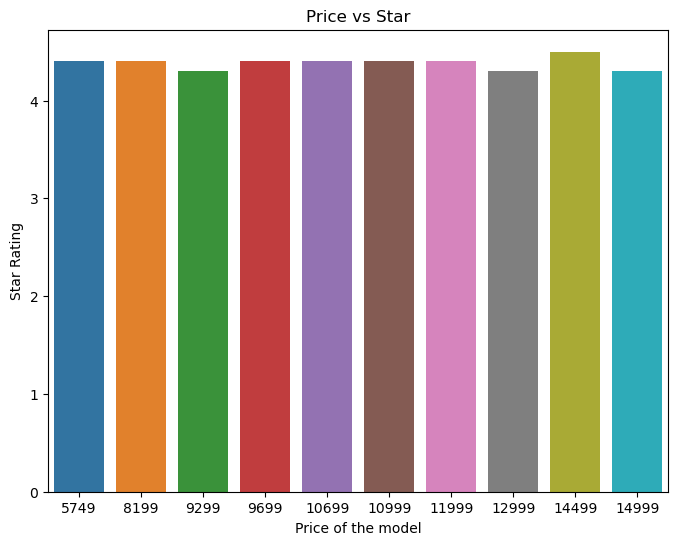

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=phone_df['discounted_price'], y=phone_df['stars'])
plt.xlabel('Price of the model')
plt.ylabel('Star Rating')
plt.title('Price vs Star')
plt.show()

We can conclude, Stars rating doesnt depend on Price

In [24]:
phone_df['title'].unique()

array(['SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)',
       'POCO C50 (Royal Blue, 32 GB)', 'POCO C50 (Country Green, 32 GB)',
       'SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)',
       'SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)',
       'REDMI 10 (Caribbean Green, 64 GB)',
       'REDMI 10 (Pacific Blue, 64 GB)',
       'REDMI 10 (Midnight Black, 64 GB)',
       'realme C35 (Glowing Black, 64 GB)',
       'SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)',
       'realme C35 (Glowing Green, 64 GB)',
       'SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)',
       'Infinix HOT 20 Play (Luna Blue, 64 GB)',
       'Infinix HOT 20 Play (Fantasy Purple, 64 GB)',
       'Infinix HOT 20 Play (Racing Black, 64 GB)',
       'Infinix HOT 20 Play (Aurora Green, 64 GB)',
       'realme C35 (Glowing Green, 128 GB)',
       'realme C35 (Glowing Black, 128 GB)',
       'SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)',
       'SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)',
       'SAMSUNG Galaxy F23 5G (Aqua B

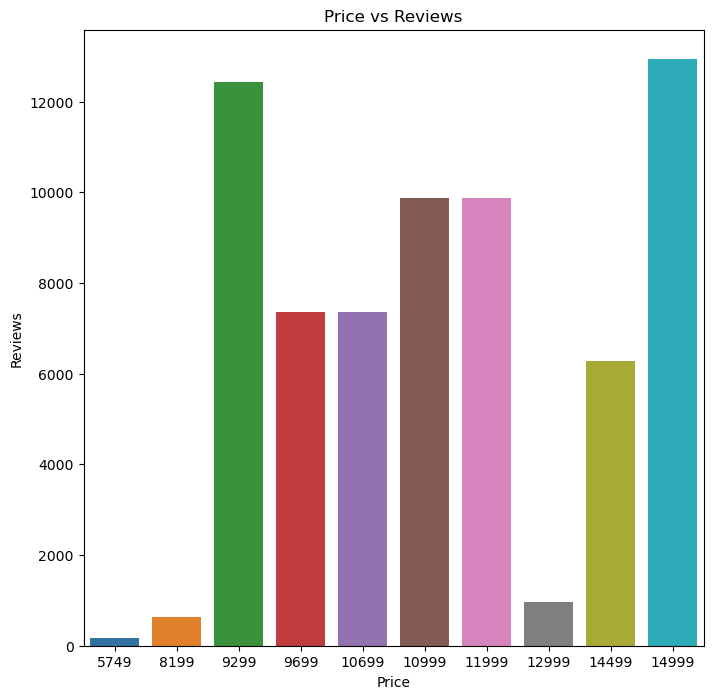

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(x=phone_df['discounted_price'], y=phone_df['reviews'])
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Price vs Reviews')
plt.show()


Price and reviews have not much dependency on each other

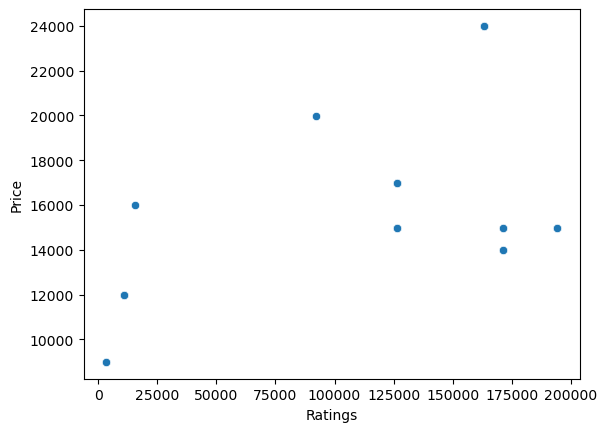

In [26]:
sns.scatterplot(x=phone_df['ratings'], y=phone_df['price_before_discount'])
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

From Above, we can observe higher prices have higher ratings

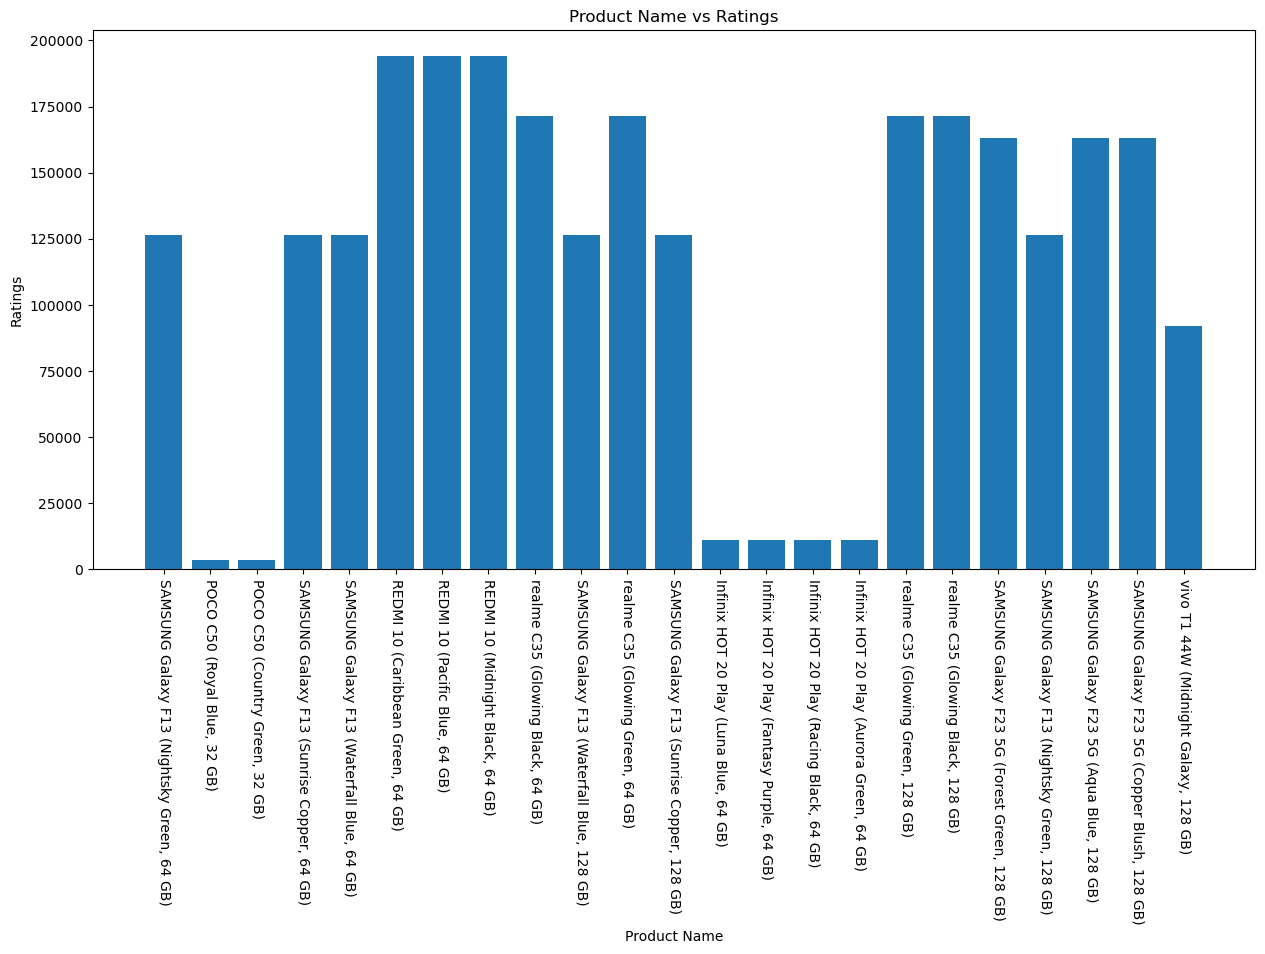

In [29]:
plt.figure(figsize=(15,7))
plt.bar(x=phone_df['title'], height=phone_df['ratings'])
plt.title('Product Name vs Ratings')
plt.xlabel('Product Name')
plt.ylabel('Ratings')
plt.xticks(rotation=270)
plt.show()        

Redmi Products have higher Ratings compared to any other mobile brand.

In [30]:
top5 = phone_df.sort_values(by='discounted_price', ascending=False).head()

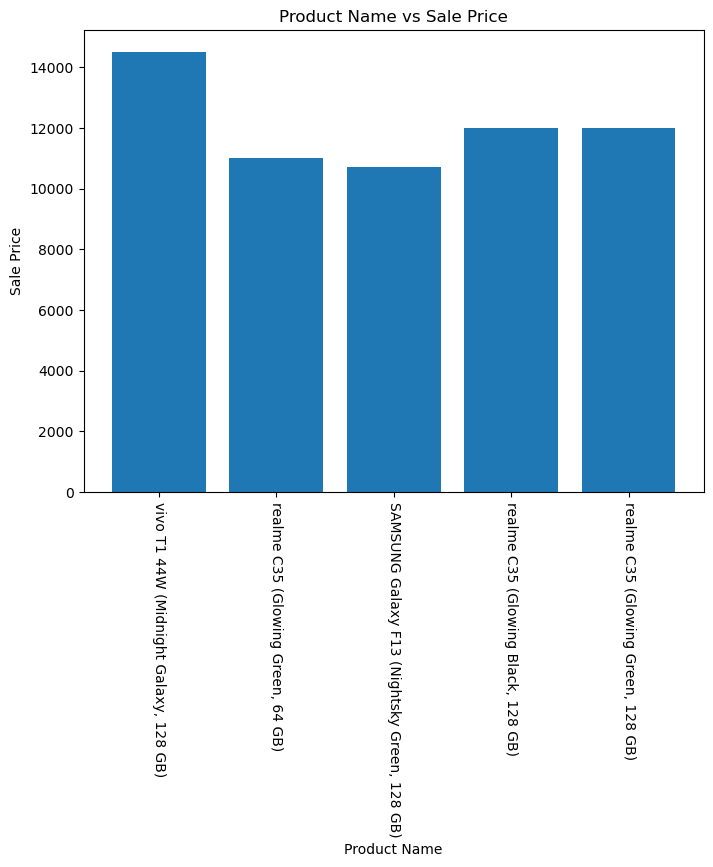

In [34]:
plt.figure(figsize=(8,6))
plt.bar(x=top5['title'], height=top5['discounted_price'])
plt.title('Product Name vs Sale Price')
plt.xlabel('Product Name')
plt.ylabel('Sale Price')
plt.xticks(rotation=270)
plt.show()    

We can observe that Vivo t1 44W 128GB is highely priced than other products. if we look closely, we see realme has 3 products in TOP 5 Priced products, so we can say overall price of realme products is higher comapred to all other products